In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [5]:

urlfile = "https://raw.githubusercontent.com/edaaydinea/AI-Projects-for-Healthcare/master/Relationship%20between%20COVID-19%20%20%26%20Happiness%20in%20that%20Country/Dataset/RAW_global_confirmed_cases.csv"
corona_dataset_csv = pd.read_csv(urlfile)

In [6]:
corona_dataset_csv.head(10)

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,42463,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626
5,Antigua and Barbuda,NaN,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131,131,131,133,134,134,134,134,139,139,139,139,139,139,139,140,141,141,141,141,141,142,144,144,144,144,144,146,146,146,146,147,148,148,148,148,151,151,152,152
6,Argentina,NaN,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1262476,1273356,1284519,1296378,1304846,1310491,1318384,1329005,1339337,1349434,1359042,1366182,1370366,1374631,1381795,1390388,1399431,1407277,1413375,1418807,1424533,1432570,1440103,1447732,1454631,1459832,1463110,1466309,1469919,1475222,1482216,1489328,1494602,1498160,1503222,1510203,1517046,1524372,1531374,1537169
7,Armenia,NaN,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,108687,110548,112680,114383,115855,117337,117886,118870,120459,121979,123646,124839,126224,126709,127522,129085,130870,132346,133594,134768,135124,135967,137231,138508,139692,140959,141937,142344,142928,144066,145240,146317,147312,148325,148682,149120,150218,151392,152253,153173
8,Australia,Australian Capital Territory,-35.47350,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,114,114,114,114,114,114,114,115,115,115,115,115,115,115,115,115,116,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
9,Australia,New South Wales,-33.86880,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4469,4469,4469,4469,4486,4498,4502,4509,4514,4517,4527,4538,4542,4548,4552,4552,4556,4564,45

In [7]:
corona_dataset_csv.shape


(271, 337)

In [8]:
#DELETING THE USELESS COLUMNS
df = corona_dataset_csv.drop(columns=["Lat","Long"],axis=1)

In [9]:
df.head(10)


,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,42463,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,Andorra,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,Angola,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626
5,Antigua and Barbuda,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131,131,131,133,134,134,134,134,139,139,139,139,139,139,139,140,141,141,141,141,141,142,144,144,144,144,144,146,146,146,146,147,148,148,148,148,151,151,152,152
6,Argentina,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1262476,1273356,1284519,1296378,1304846,1310491,1318384,1329005,1339337,1349434,1359042,1366182,1370366,1374631,1381795,1390388,1399431,1407277,1413375,1418807,1424533,1432570,1440103,1447732,1454631,1459832,1463110,1466309,1469919,1475222,1482216,1489328,1494602,1498160,1503222,1510203,1517046,1524372,1531374,1537169
7,Armenia,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,108687,110548,112680,114383,115855,117337,117886,118870,120459,121979,123646,124839,126224,126709,127522,129085,130870,132346,133594,134768,135124,135967,137231,138508,139692,140959,141937,142344,142928,144066,145240,146317,147312,148325,148682,149120,150218,151392,152253,153173
8,Australia,Australian Capital Territory,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,114,114,114,114,114,114,114,115,115,115,115,115,115,115,115,115,116,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
9,Australia,New South Wales,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4469,4469,4469,4469,4486,4498,4502,4509,4514,4517,4527,4538,4542,4548,4552,4552,4556,4564,4568,4577,4582,4588,4597,4603,4605,4610,4614,4620,4622,4624,4633,4639,4642,4645,4650,4657,4666,4682,4712,4748


Aggregating the rows by the country

In [10]:
corona_dataset_aggreageted = df.groupby(by="Country/Region").sum()


In [11]:
corona_dataset_aggreageted.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,42463,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626


 Visualizing data related to a country for example China


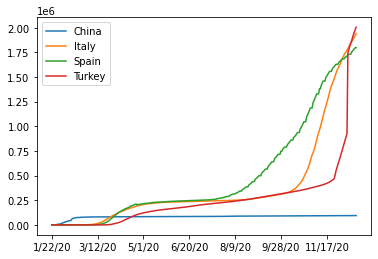

In [12]:
corona_dataset_aggreageted.loc["China"].plot()
corona_dataset_aggreageted.loc["Italy"].plot()
corona_dataset_aggreageted.loc["Spain"].plot()
corona_dataset_aggreageted.loc["Turkey"].plot()
plt.legend()

Calculating a good measure


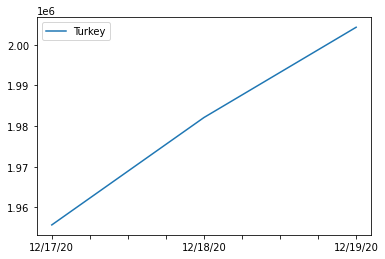

In [13]:
corona_dataset_aggreageted.loc["Turkey"][-3:].plot()
plt.legend()


calculating the first derivative of the curve


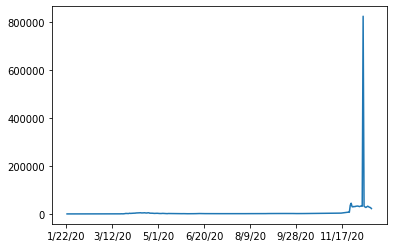

In [14]:
corona_dataset_aggreageted.loc["Turkey"].diff().plot()


find maxmimum infection rate for China


In [15]:
corona_dataset_aggreageted.loc["Turkey"].diff().max()

823225.0

In [16]:
corona_dataset_aggreageted.loc["China"].diff().max()


15136.0

find maximum infection rate for all of the countries.

In [17]:
countries = list(corona_dataset_aggreageted.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggreageted.loc[c].diff().max())

In [18]:
corona_dataset_aggreageted["max_infection_rate"] = max_infection_rates


In [19]:
corona_dataset_aggreageted.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681,915.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560,299.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626,355.0


create a new dataframe with only needed column

In [20]:
corona_data = pd.DataFrame(corona_dataset_aggreageted["max_infection_rate"])


In [21]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


Task4:
.Importing the WorldHappinessReport.csv dataset

. selecting needed columns for our analysis

. join the datasets

. calculate the correlations as the result of our analysis

importing the dataset

In [23]:
urlfile = "https://raw.githubusercontent.com/edaaydinea/AI-Projects-for-Healthcare/master/Relationship%20between%20COVID-19%20%20%26%20Happiness%20in%20that%20Country/Dataset/worldwide_happiness_report.csv"
happiness_report_csv = pd.read_csv(urlfile)
happiness_report_csv.head()



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


let's drop the useless columns

In [24]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [25]:
happiness_report_csv.drop(columns=useless_cols, axis=1, inplace=True)


In [26]:
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


 changing the indices of the dataframe


In [27]:
happiness_report_csv.set_index("Country or region", inplace=True)


In [28]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


now let's join two dataset we have prepared

Corona Dataset :


In [29]:
corona_data.head()


,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [30]:
corona_data.shape


(191, 1)

wolrd happiness report Dataset :


In [31]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [32]:
happiness_report_csv.shape


(156, 4)

In [33]:
data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,879.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


correlation matrix

In [34]:
data.corr()


,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.116490,0.083619,0.088526,-0.091004
GDP per capita,0.116490,1.000000,0.757521,0.859431,0.394799
Social support,0.083619,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.088526,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,-0.091004,0.394799,0.456317,0.423146,1.000000


Visualization of the results

our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [35]:
data.head()


,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,879.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


Plotting GDP vs maximum Infection rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


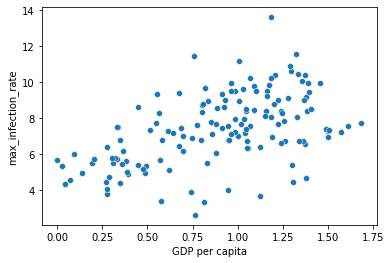

In [36]:
x = data["GDP per capita"]
y = data["max_infection_rate"]

sns.scatterplot(x,np.log(y))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


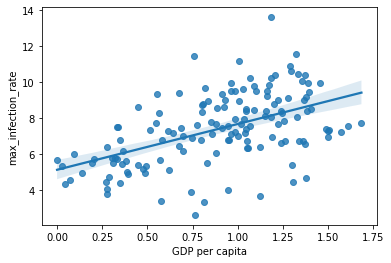

In [37]:
sns.regplot(x, np.log(y))


Plotting Social support vs maximum Infection rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


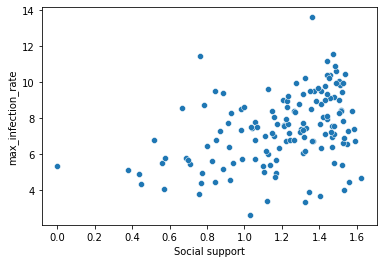

In [38]:
x = data["Social support"]
y = data["max_infection_rate"]

sns.scatterplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


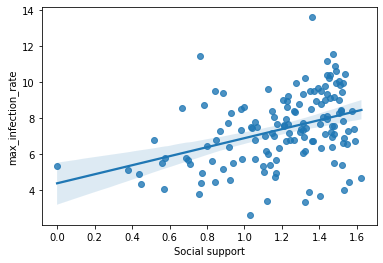

In [39]:
sns.regplot(x, np.log(y))


Plotting Healthy life expectancy vs maximum Infection rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


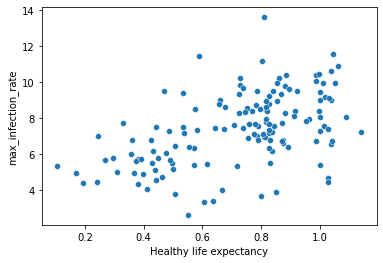

In [40]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]

sns.scatterplot(x,np.log(y))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


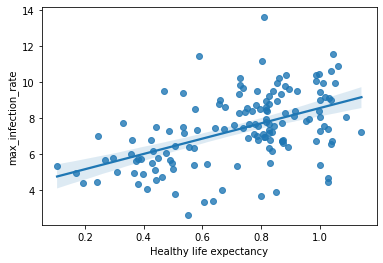

In [41]:
sns.regplot(x, np.log(y))

Plotting Freedom to make life choices vs maximum Infection rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


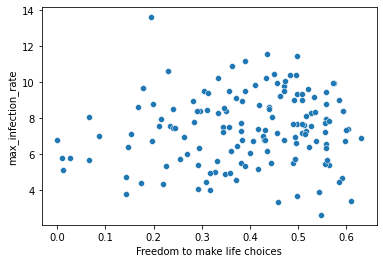

In [42]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]

sns.scatterplot(x,np.log(y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


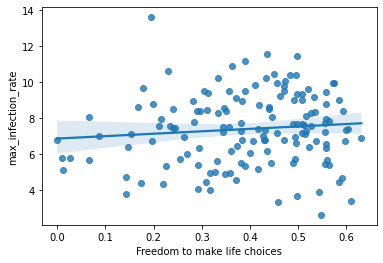

In [43]:
sns.regplot(x, np.log(y))
